In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
engine.execute("SELECT * FROM measurement order by date ").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2725, 'USC00513117', '2010-01-01', 0.28, 67.0),
 (9008, 'USC00518838', '2010-01-01', 0.21, 72.0),
 (9519, 'USC00519523', '2010-01-01', 0.15, 75.0),
 (12188, 'USC00519281', '2010-01-01', 0.15, 70.0),
 (14960, 'USC00511918', '2010-01-01', 0.05, 66.0),
 (16939, 'USC00516128', '2010-01-01', 0.14, 73.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (2726, 'USC00513117', '2010-01-02', 0.0, 65.0),
 (9009, 'USC00518838', '2010-01-02', 0.02, 73.0),
 (9520, 'USC00519523', '2010-01-02', 0.0, 75.0),
 (12189, 'USC00519281', '2010-01-02', 0.0, 62.0),
 (14961, 'USC00511918', '2010-01-02', 0.0, 70.0),
 (16940, 'USC00516128', '2010-01-02', 0.0, 61.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (2727, 'USC00513117', '2010-01-03', 0.0, 75.0),
 (9010, 'USC00518838', '2010-01-03', 0.0, 67.0),
 (9521, 'USC00519523', '2010-01-03', 0.0, 77.0),
 (12190, 'USC00519281', '2010-01-03', 0.0, 74.0),
 (14962, 'USC00511918', '2010-01-03', 0.0, 75.0),
 (16941, 'USC

In [9]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

most_recent_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
twelve_months_ago = most_recent_date - dt.timedelta(days=365)

print(f"Lookup Date: {twelve_months_ago}")

Lookup Date: 2016-08-23 00:00:00


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
#prcp_scores = session.query(*sel).filter(Measurement.date>=twelve_months_ago, Measurement.prcp!="None").group_by(Measurement.date).order_by(Measurement.date).all()
prcp_scores = session.query(*sel).filter(Measurement.date>=twelve_months_ago, Measurement.prcp!="None").order_by(Measurement.date).all()


prcp_scores

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.05),
 ('2016-08-31', 0.13),
 ('2016-08-31', 0.1),
 ('

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_scores_df = pd.DataFrame(prcp_scores, columns=['Date', 'Precipitation Score'])
prcp_scores_df.set_index('Date', inplace=True)

# Sort the dataframe by date
prcp_scores_df = prcp_scores_df.sort_index()

prcp_scores_df

,Precipitation Score
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


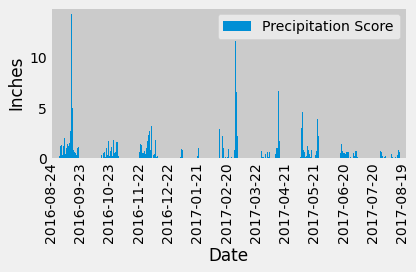

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_scores_df.plot.bar()

for i, t in enumerate(ax.get_xticklabels()):
    if (i % 30) != 0:
        t.set_visible(False)

ax.set_ylabel("Inches")
plt.tight_layout()
plt.show()

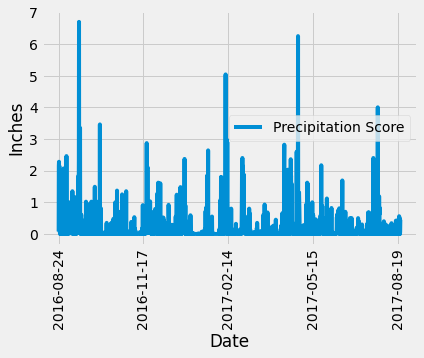

In [21]:
ax = prcp_scores_df.plot(rot=90)

ax.set_ylabel("Inches")
plt.show()

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_scores_df.describe()

,Precipitation Score
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset


In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [21]:
# Close Session
session.close()